In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#https://github.com/MilesCranmer/PySR

Example 1

In [3]:
x = np.arange(0., 20., 1)
y = 1.63*np.sin(x)+0.5*x+1.56

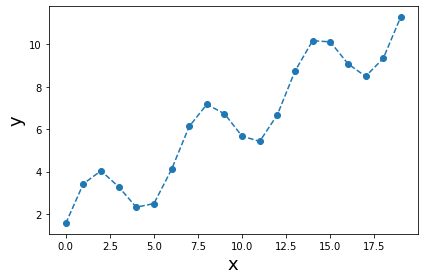

In [4]:
plt.figure(figsize=(6, 4))
plt.plot(x,y, '--o')
plt.ylabel('y', fontsize=18.0)
plt.xlabel('x', fontsize=18.0)
plt.tight_layout()
plt.show()
plt.show()

In [5]:
x.shape, y.shape

((20,), (20,))

In [6]:
from pysr import pysr, best

In [7]:
%%time
model = pysr(
 x,
 y,
 niterations=40,
 binary_operators=["+","*"],
 unary_operators=[
 "cos",
 "exp",
 "sin",
"inv(x) = 1/x", # Define your own operator!)
 ]
)

Running on julia -O3 /tmp/tmpc0cciubn/runfile.jl
Activating environment on workers.
      From worker 4:	 Activating environment at `~/anaconda3/lib/python3.6/site-packages/Project.toml`
      From worker 5:	 Activating environment at `~/anaconda3/lib/python3.6/site-packages/Project.toml`
      From worker 3:	 Activating environment at `~/anaconda3/lib/python3.6/site-packages/Project.toml`
      From worker 2:	 Activating environment at `~/anaconda3/lib/python3.6/site-packages/Project.toml`
Importing installed module on workers...Finished!
Copying definition of inv to workers...Finished!
Testing module on workers...Finished!
Testing entire pipeline on workers...Finished!
Started!

Cycles per second: 3.090e+03
Progress: 1 / 160 total iterations (0.625%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
3           5.316e+00  1.457e-01  (0.45152414 * x0)
5           2.229e+00  4.345e-01  (x0 * (0.603564 + 0.001064372))
7           1.447e+00


Cycles per second: 2.640e+04
Progress: 57 / 160 total iterations (35.625%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.104e+01  -9.384e-01  x0
2           8.460e+00  9.111e-01  exp(1.7646056)
3           3.287e+00  9.455e-01  (x0 * 0.7023573)
4           2.233e+00  3.867e-01  (x0 * exp(-0.4831078))
5           1.257e+00  5.743e-01  (1.5600246 + (0.4999985 * x0))
8           1.878e-01  6.337e-01  ((1.5600246 + (0.4999985 * x0)) + sin(x0))
10          8.979e-10  9.579e+00  ((1.5600246 + (0.4999985 * x0)) + (1.6300362 * sin(x0)))


Cycles per second: 2.640e+04
Progress: 61 / 160 total iterations (38.125%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.104e+01  -9.384e-01  x0
2           8.460e+00  9.111e-01  exp(1.7646056)
3           3.287e+00  9.455e-01  (x0 * 0.7023573)
4           2.233e+00  3.867e-01  (x0 * exp(-0.4831078))
5           1.257e+00  5.743


Cycles per second: 2.640e+04
Progress: 119 / 160 total iterations (74.375%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.104e+01  -9.384e-01  x0
2           8.460e+00  9.111e-01  exp(1.7646056)
3           3.287e+00  9.455e-01  (x0 * 0.7023573)
4           2.233e+00  3.867e-01  (x0 * exp(-0.4831078))
5           1.257e+00  5.743e-01  (1.5600246 + (0.4999985 * x0))
8           1.878e-01  6.337e-01  ((1.5600246 + (0.4999985 * x0)) + sin(x0))
10          8.979e-10  9.579e+00  ((1.5600246 + (0.4999985 * x0)) + (1.6300362 * sin(x0)))


Cycles per second: 2.630e+04
Progress: 123 / 160 total iterations (76.875%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.104e+01  -9.384e-01  x0
2           8.460e+00  9.111e-01  exp(1.7646056)
3           3.287e+00  9.455e-01  (x0 * 0.7023573)
4           2.233e+00  3.867e-01  (x0 * exp(-0.4831078))
5           1.257e+00  5.7

In [8]:
print(best(model))

0.4999985*x0 + 1.6300362*sin(x0) + 1.5600246


In [9]:
y_pred=0.4999985*x + 1.6300362*np.sin(x) + 1.5600246

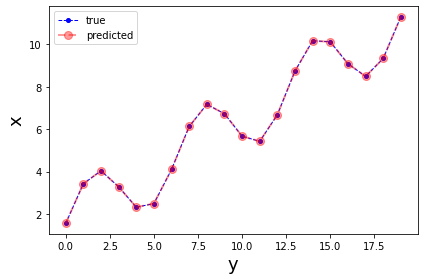

In [10]:
plt.figure(figsize=(6, 4))
plt.plot(x,y, '--o', color='b', markersize=4, lw=1, label='true')
plt.plot(x,y_pred, '--ro', markersize=8, lw=2, alpha=0.4,  label='predicted')
plt.ylabel('x', fontsize=18.0)
plt.xlabel('y', fontsize=18.0)
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
np.sum((y-y_pred)**2)

1.788698723653124e-08

Example 2

In [12]:
np.random.seed(0)
nsample = 100
sig = 0.2
x_ = np.linspace(-50, 50, nsample)
x = np.column_stack((x_/5, 10*np.sin(x_), (x_-5)**3, np.ones(nsample)))
beta = [0.01, 1, 0.001, 5.]
y_true = np.dot(x, beta)
y = y_true + sig * np.random.normal(size=nsample)

In [13]:
x.shape, y.shape

((100, 4), (100,))

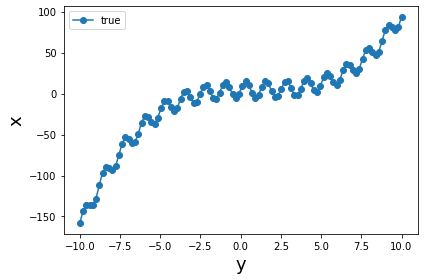

In [14]:
plt.figure(figsize=(6, 4))
plt.plot(x[:,0],y, '-o', label='true')
plt.ylabel('x', fontsize=18.0)
plt.xlabel('y', fontsize=18.0)
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
%%time

model = pysr(
 x,
 y,
 niterations=40,
 binary_operators=["+","*"],
 unary_operators=[
 "cos",
 "exp",
 "sin",
"inv(x) = 1/x", # Define your own operator!)
 ]
)

Running on julia -O3 /tmp/tmp1lpu4c1_/runfile.jl
Activating environment on workers.
      From worker 3:	 Activating environment at `~/anaconda3/lib/python3.6/site-packages/Project.toml`
      From worker 5:	 Activating environment at `~/anaconda3/lib/python3.6/site-packages/Project.toml`
      From worker 4:	 Activating environment at `~/anaconda3/lib/python3.6/site-packages/Project.toml`
      From worker 2:	 Activating environment at `~/anaconda3/lib/python3.6/site-packages/Project.toml`
Importing installed module on workers...Finished!
Copying definition of inv to workers...Finished!
Testing module on workers...Finished!
Testing entire pipeline on workers...Finished!
Started!

Cycles per second: 2.760e+03
Progress: 1 / 160 total iterations (0.625%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.252e+03  1.809e-01  x0
4           9.616e+02  2.836e-01  (x0 * exp(1.5483366))
5           5.891e+02  4.900e-01  ((x0 + -1.17


Cycles per second: 1.310e+04
Progress: 18 / 160 total iterations (11.250%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.252e+03  1.809e-01  x0
3           5.990e+02  6.621e-01  (x0 * 7.806586)
7           5.072e+02  4.158e-02  ((-7.864577 + (8.032904 * x0)) + x1)
9           5.051e+02  2.123e-03  ((-7.86517 + (8.020544 * x0)) + (0.79188573 * x1))
11          4.773e+02  2.824e-02  ((-12.522446 + (9.152356 * x0)) + (12.27309 * cos(exp(x0))))
14          4.636e+02  9.707e-03  (((x0 + -1.1154753) * 7.7505794) + (cos(exp(cos(x0) + 0.41248703)) * x0))
15          4.611e+02  5.562e-03  (((-12.522177 + (9.151512 * x0)) + (12.263872 * cos(exp(x0)))) + (0.5726567 * x1))
16          4.398e+02  4.730e-02  ((-7.771158 + (x0 * cos(exp(inv(sin(0.64611554 + cos(x0))))))) + (7.7505794 * x0))
17          3.453e+02  2.419e-01  ((-25.011923 + exp(1.5542668 + inv(0.42535943 + exp(inv(0.11167606 * x0))))) + (9.285912 * x0))
19          3.03


Cycles per second: 1.500e+04
Progress: 37 / 160 total iterations (23.125%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.252e+03  1.809e-01  x0
3           5.990e+02  6.621e-01  (x0 * 7.806586)
7           5.072e+02  4.158e-02  ((-7.864577 + (8.032904 * x0)) + x1)
9           5.051e+02  2.123e-03  ((-7.86517 + (8.020544 * x0)) + (0.79188573 * x1))
11          4.773e+02  2.824e-02  ((-12.522446 + (9.152356 * x0)) + (12.27309 * cos(exp(x0))))
14          4.636e+02  9.707e-03  (((x0 + -1.1154753) * 7.7505794) + (cos(exp(cos(x0) + 0.41248703)) * x0))
15          4.611e+02  5.562e-03  (((-12.522177 + (9.151512 * x0)) + (12.263872 * cos(exp(x0)))) + (0.5726567 * x1))
16          4.398e+02  4.730e-02  ((-7.771158 + (x0 * cos(exp(inv(sin(0.64611554 + cos(x0))))))) + (7.7505794 * x0))
17          3.426e+02  2.497e-01  ((-26.475563 + exp(1.6750103 + inv(0.43999317 + exp(inv(0.111659765 * x0))))) + (9.364755 * x0))
19          3.0


Cycles per second: 1.620e+04
Progress: 58 / 160 total iterations (36.250%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.252e+03  1.809e-01  x0
3           5.990e+02  6.621e-01  (x0 * 7.806586)
7           5.072e+02  4.158e-02  ((-7.864577 + (8.032904 * x0)) + x1)
9           5.051e+02  2.123e-03  ((-7.86517 + (8.020544 * x0)) + (0.79188573 * x1))
10          4.456e+02  1.253e-01  (cos(1.3315966 * x0) + (0.0013309082 * (x2 + x3)))
16          4.398e+02  2.197e-03  ((-7.771158 + (x0 * cos(exp(inv(sin(0.64611554 + cos(x0))))))) + (7.7505794 * x0))
17          3.404e+02  2.560e-01  ((-27.889559 + exp(1.7778952 + inv(0.4538064 + exp(inv(0.11159785 * x0))))) + (9.417674 * x0))
19          2.979e+02  6.667e-02  (((-27.889559 + exp(1.7778952 + inv(0.4538064 + exp(inv(0.11159785 * x0))))) + (9.45395 * x0)) + x1)


Cycles per second: 1.620e+04
Progress: 61 / 160 total iterations (38.125%)
Hall of Fame:
--------------------------


Cycles per second: 2.100e+04
Progress: 96 / 160 total iterations (60.000%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.252e+03  1.809e-01  x0
3           7.432e+01  1.706e+00  (0.0010003943 * x2)
5           2.521e+01  5.405e-01  (x1 + (0.0010003943 * x2))
7           4.159e-02  3.204e+00  ((5.017021 + x1) + (0.0010003943 * x2))
11          3.891e-02  1.665e-02  (((4.990704 + (0.020532949 * x0)) + x1) + (0.0009983199 * x2))


Cycles per second: 2.280e+04
Progress: 102 / 160 total iterations (63.750%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.252e+03  1.809e-01  x0
3           7.432e+01  1.706e+00  (0.0010003943 * x2)
5           2.521e+01  5.405e-01  (x1 + (0.0010003943 * x2))
7           4.159e-02  3.204e+00  ((5.017021 + x1) + (0.0010003943 * x2))
11          3.891e-02  1.665e-02  (((4.990704 + (0.020532949 * x0)) + x1) + (0.0009983199 * x2))


Cy

In [16]:
print(best(model))

x1 + 0.0010003943*x2 + 5.017021


In [17]:
y_pred=x[:,1] + 0.0010003943*x[:,2] + 5.017021

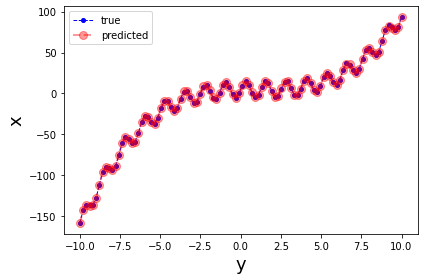

In [18]:
plt.figure(figsize=(6, 4))
plt.plot(x[:,0],y, '--o', color='b', markersize=4, lw=1, label='true')
plt.plot(x[:,0],y_pred, '--ro', markersize=8, lw=2, alpha=0.4,  label='predicted')
plt.ylabel('x', fontsize=18.0)
plt.xlabel('y', fontsize=18.0)
plt.legend()
plt.tight_layout()
plt.show()

Example 3

In [19]:
np.random.seed(0)

x = 2 * np.random.randn(100, 5)
y = 2.5382 * np.cos(x[:, 3]) + x[:, 0] ** 2 - 0.5

In [20]:
x.shape, y.shape

((100, 5), (100,))

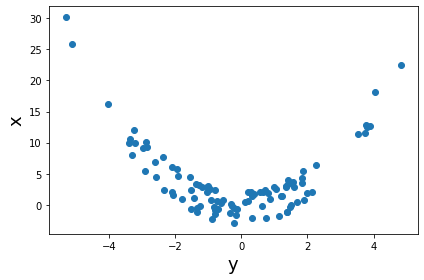

In [21]:
plt.figure(figsize=(6, 4))
plt.plot(x[:,0],y, 'o')
plt.ylabel('x', fontsize=18.0)
plt.xlabel('y', fontsize=18.0)
plt.tight_layout()
plt.show()

In [22]:
%%time

model_with_loss = pysr(
 x,
 y,
 niterations=40,
 binary_operators=["+","*"],
 unary_operators=[
 "cos",
 "exp",
 "sin",
"inv(x) = 1/x", # Define your own operator!)
 ],
loss="loss(x, y) = (x - y)^2",
# ^ Custom loss function (julia syntax)
)

Running on julia -O3 /tmp/tmpzjxr5_rq/runfile.jl
Activating environment on workers.
      From worker 3:	 Activating environment at `~/anaconda3/lib/python3.6/site-packages/Project.toml`
      From worker 5:	 Activating environment at `~/anaconda3/lib/python3.6/site-packages/Project.toml`
      From worker 4:	 Activating environment at `~/anaconda3/lib/python3.6/site-packages/Project.toml`
      From worker 2:	 Activating environment at `~/anaconda3/lib/python3.6/site-packages/Project.toml`
Importing installed module on workers...Finished!
Copying definition of inv to workers...Finished!
Copying definition of loss to workers...Finished!
Testing module on workers...Finished!
Testing entire pipeline on workers...Finished!
Started!

Cycles per second: 2.640e+03
Progress: 1 / 160 total iterations (0.625%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
3           3.111e+00  7.932e-01  (x0 * x0)
5           3.046e+00  1.060e-02  ((x0 * x0) 


Cycles per second: 2.640e+04
Progress: 61 / 160 total iterations (38.125%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           3.365e+01  -1.365e-03  3.640918
2           3.362e+01  7.923e-04  exp(1.3847833)
3           3.111e+00  2.380e+00  (x0 * x0)
5           3.105e+00  9.283e-04  (-0.49997628 + (x0 * x0))
8           2.500e-01  8.398e-01  ((x0 * x0) + (2.538248 * cos(x3)))
10          1.893e-09  9.349e+00  ((-0.49997628 + (x0 * x0)) + (2.538248 * cos(x3)))


Cycles per second: 2.700e+04
Progress: 66 / 160 total iterations (41.250%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           3.365e+01  -1.365e-03  3.640918
2           3.362e+01  7.923e-04  exp(1.3847833)
3           3.111e+00  2.380e+00  (x0 * x0)
5           3.105e+00  9.283e-04  (-0.49997628 + (x0 * x0))
8           2.500e-01  8.398e-01  ((x0 * x0) + (2.538248 * cos(x3)))
10          1.893e-09  9.349e+00  


Cycles per second: 2.820e+04
Progress: 135 / 160 total iterations (84.375%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           3.365e+01  -1.365e-03  3.640918
2           3.362e+01  7.923e-04  exp(1.3847833)
3           3.111e+00  2.380e+00  (x0 * x0)
5           3.105e+00  9.283e-04  (-0.49997628 + (x0 * x0))
8           2.500e-01  8.398e-01  ((x0 * x0) + (2.538248 * cos(x3)))
10          1.893e-09  9.349e+00  ((-0.49997628 + (x0 * x0)) + (2.538248 * cos(x3)))


Cycles per second: 2.820e+04
Progress: 140 / 160 total iterations (87.500%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           3.365e+01  -1.365e-03  3.640918
2           3.362e+01  7.923e-04  exp(1.3847833)
3           3.111e+00  2.380e+00  (x0 * x0)
5           3.105e+00  9.283e-04  (-0.49997628 + (x0 * x0))
8           2.500e-01  8.398e-01  ((x0 * x0) + (2.538248 * cos(x3)))
10          1.893e-09  9.349e+00

In [23]:
print(best(model_with_loss))

x0**2 + 2.538248*cos(x3) - 0.49997628


In [24]:
y_pred = x[:, 0]**2 + 2.538248*np.cos(x[:, 3]) - 0.49997628

In [25]:
sum((y-y_pred)**2)

1.892242264156502e-07

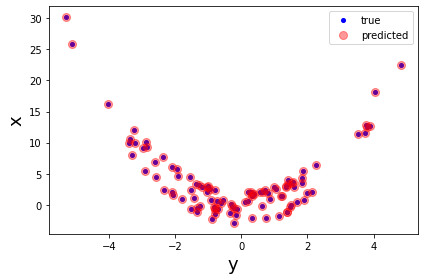

In [26]:
plt.figure(figsize=(6, 4))
plt.plot(x[:,0],y, 'o', color='b', markersize=4, lw=1, label='true')
plt.plot(x[:,0],y_pred, 'ro', markersize=8, lw=2, alpha=0.4,  label='predicted')
plt.ylabel('x', fontsize=18.0)
plt.xlabel('y', fontsize=18.0)
plt.legend()
plt.tight_layout()
plt.show()